In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Cargar los datos de phishing y no phishing
phishing_df = pd.read_excel('FISHING.xlsx')
non_phishing_df = pd.read_excel('NOFISHING.xlsx')

# Agregar una columna de etiqueta en ambos DataFrames
phishing_df['label'] = 1  # 1 indica phishing
non_phishing_df['label'] = 0  # 0 indica no phishing

# Combinar ambos DataFrames en uno solo
data = pd.concat([phishing_df, non_phishing_df], ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
data.to_csv('combined_phishing_data.csv', index=False)  # 'index=False' evita que se guarde el índice

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar los datos combinados
data = pd.read_csv('combined_phishing_data.csv')

# Verificar los datos
print(data.head())

# Paso 1: Preprocesamiento de texto
# Asume que la columna con el contenido de texto se llama 'text'
texts = data['url'].astype(str).values
labels = data['label'].values

# Tokenización de los textos
tokenizer = Tokenizer(num_words=10000)  # Usa las 10,000 palabras más comunes
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding para hacer todas las secuencias del mismo tamaño
max_len = 100  # Longitud máxima de las secuencias
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Paso 2: Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Paso 3: Construcción de la RNN
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Mostrar la estructura del modelo
model.summary()

# Paso 4: Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

# Paso 5: Evaluación
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Paso 6: Guardar el modelo
model.save('phishing_rnn_model.h5')


                                                 url  label
0        https://swift-multiconnections.web.app/app/      1
1     https://protocolresetsrpctool.com/wallets.html      1
2    https://protocolvaultresetsrpc.com/wallets.html      1
3  https://dropfixsync.site/integratewallet/dapps...      1
4  https://docs.google.com/drawings/d/1zYw6OunpGo...      1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9780 - loss: 0.0580 - val_accuracy: 0.9982 - val_loss: 0.0073
Epoch 2/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9987 - val_loss: 0.0064
Epoch 3/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9986 - val_loss: 0.0111
Epoch 4/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9999 - loss: 8.0948e-04 - val_accuracy: 0.9990 - val_loss: 0.0083
Epoch 5/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9998 - loss: 8.9890e-04 - val_accuracy: 0.9982 - val_loss: 0.0117
Epoch 6/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9999 - loss: 3.8121e-04 - val_accuracy: 0.9978 - val_loss: 0.0153
Epoch 7/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9998 - loss: 7.3414e-04 - val_accuracy: 0.9985 - val_loss: 0.0132
Epoch 8/10
1917/1917 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - ac

Precisión en el conjunto de prueba: 99.77%


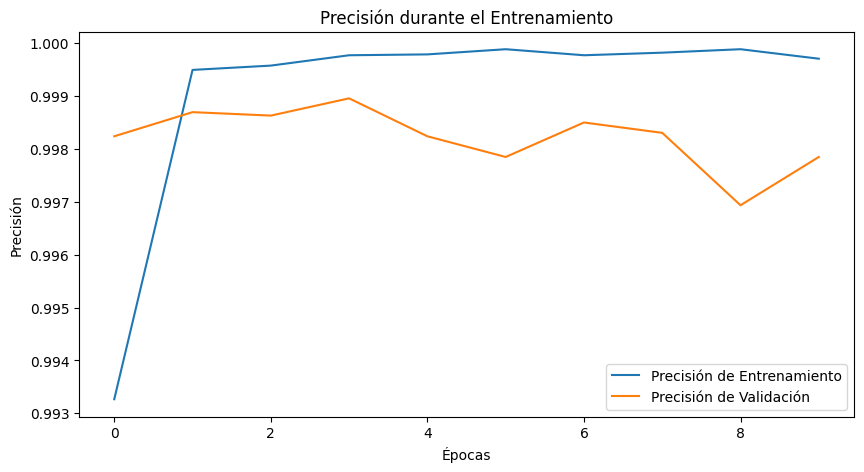

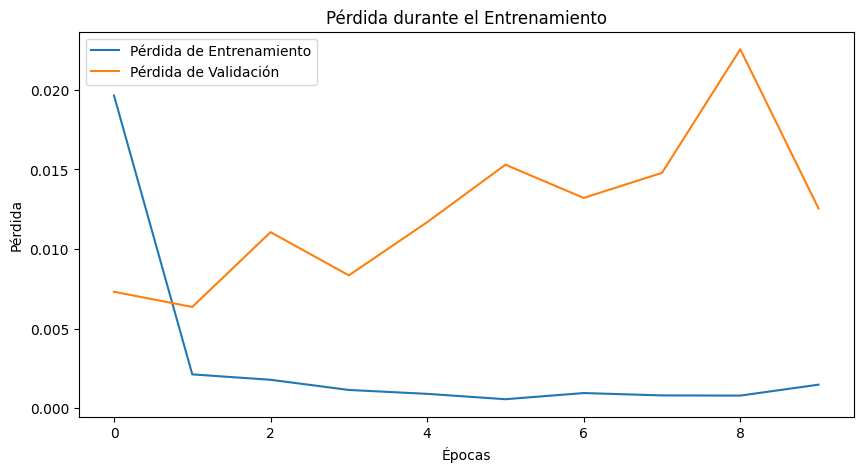

Precisión en el conjunto de prueba: 99.77%
Pérdida en el conjunto de prueba: 0.0136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Probabilidad de phishing: 1.00


In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión del entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida del entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")

# Predicción en un ejemplo
example_text = ["example phishing text to test"]  # Cambiar por un texto real
example_seq = tokenizer.texts_to_sequences(example_text)
example_padded = pad_sequences(example_seq, maxlen=max_len)
prediction = model.predict(example_padded)
print(f"Probabilidad de phishing: {prediction[0][0]:.2f}")


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Convertir la precisión a porcentaje y mostrar el resultado
print(f"El porcentaje de predicción del modelo es: {accuracy * 100:.2f}%")


599/599 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9979 - loss: 0.0127
El porcentaje de predicción del modelo es: 99.77%


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Paso 1: Cargar el modelo entrenado
model = load_model('phishing_rnn_model.h5')
print("Modelo cargado correctamente.")

# Paso 2: Cargar y preprocesar los datos de prueba
test_data_file = 'TESTING.xlsx'  # Ruta del archivo de prueba
test_data = pd.read_excel(test_data_file)

# Verificar valores nulos
print("Valores nulos en los datos de prueba:\n", test_data.isnull().sum())
test_data.fillna('', inplace=True)  # Rellenar valores nulos con cadenas vacías

# Separar textos y etiquetas
texts = test_data['url'].astype(str).values  # Asegúrate de que la columna se llama 'url'
labels = test_data['label'].values  # Columna de etiquetas

# Paso 3: Tokenización y padding (usando los mismos parámetros del entrenamiento)
tokenizer = Tokenizer(num_words=10000)  # Usa el mismo límite de palabras
training_data = pd.read_csv('combined_phishing_data.csv')  # Datos de entrenamiento originales
tokenizer.fit_on_texts(training_data['url'].astype(str).values)  # Ajustar el tokenizer con datos de entrenamiento

# Convertir textos en secuencias y aplicar padding
sequences = tokenizer.texts_to_sequences(texts)
max_len = 100  # Longitud máxima usada en el entrenamiento
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Paso 4: Realizar predicciones
predictions = model.predict(padded_sequences)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convertir probabilidades a 0 o 1

# Paso 5: Evaluar el rendimiento
print("\nConfusion Matrix:\n", confusion_matrix(labels, predicted_labels))
print("\nClassification Report:\n", classification_report(labels, predicted_labels))
print("\nAccuracy:", accuracy_score(labels, predicted_labels))

# Paso 6: Guardar resultados
test_data['predicted_label'] = predicted_labels
test_data.to_csv('testing_results_rnn.csv', index=False)
print("Resultados guardados en 'testing_results_rnn.csv'.")

Modelo cargado correctamente.
Valores nulos en los datos de prueba:
 url      0
label    0
dtype: int64
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Confusion Matrix:
 [[ 380 1508]
 [  86 1714]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.20      0.32      1888
           1       0.53      0.95      0.68      1800

    accuracy                           0.57      3688
   macro avg       0.67      0.58      0.50      3688
weighted avg       0.68      0.57      0.50      3688


Accuracy: 0.5677874186550976
Resultados guardados en 'testing_results_rnn.csv'.
